CS166 Pre-class work 13.1
# Wolff Cluster Algorithm for the Ising Model
#### April 7, 2020 | Rebecca Mqamelo 

In [1]:
import scipy
from matplotlib import pyplot as plt

class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
        '''
        self.size = size
        self.temperature = temperature
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temperature = float(temp)

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        return -self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1))).sum()

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        delta_E = 2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))

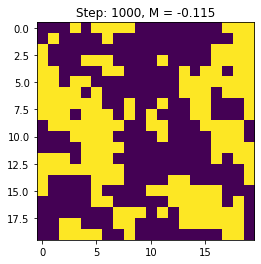

In [2]:
size = 20
sim = IsingSimulation(size, temperature=1043)  # Ising model at the Curie temperature
for _ in range(1000):
    sim.update()
sim.display()

### Task 1
From the study guide, we know that the Boltzmann distribution tells us what the probability is of
observing a state at equilibrium. At low temperatures, we expect the states where all cells have the
same sign (either all + or all – ) to be much more probable than any other state. So if we start from
a random initial state, we should drop into one of those two states eventually.
Test whether this indeed happens.
>● Randomly initialize the simulation, set the temperature to 1 (that is 1 Kelvin, which is close
to absolute 0 — a theoretically unobtainable temperature), and wait for the simulation state
to stabilize (this might take up to 100,000 steps).

> ● Measure the average magnetization of the final state.

> ● Repeat this simulation a number of times to get a probability distribution over the average
magnetization. Theoretically, the distribution should be evenly split between +1 and –1, but
you will find that the simulation often gets stuck in a suboptimal state with a different
average magnetization.

> ● Explain what would happen to the acceptance probability of the update step if the
temperature is set to 0. This motivates why we always set the temperature at least slightly
greater than 0

In [15]:
size = 20
trials = 100
steps = 100000
ave_mags = []

for i in range(trials): 
    sim = IsingSimulation(size, temperature=1)  # Ising model at 1 Kelvin
    for _ in range(steps):
        sim.update()
    ave_mags.append(sim.average_magnetism())
    #sim.display()

### Task 2 (simulated annealing)
> ● Start from a random initial state, as before, but rather than setting the temperature to 1 K
straight away, start from T = 2000 K and decrease it by 1 K after every 100 update steps
until you reach a value of T = 1 K. Wait for the simulation state to stabilize.

> ● What is the distribution over average magnetization now? (You can get even better results
by decreasing the temperature more slowly, for example, 1 K after every 400 steps.)

In [16]:
ave_mags_2 = []

for i in range(trials): 
    sim = IsingSimulation(size, temperature=2000)  # Ising model at 2000 Kelvin
    for s in range(steps):
        if sim.temperature <= 1:
            sim.temperature =1
        sim.update()
        if s%50==0: # Decrease temperature by 1 every 100 steps
            sim.temperature -= 1
    ave_mags_2.append(sim.average_magnetism())
    #sim.display()

### Data viz
It seems that over time, the system displays the same macroscopic behaviour in that low energy states (where spins are mostly unidirectional) are more probably than high energy states.

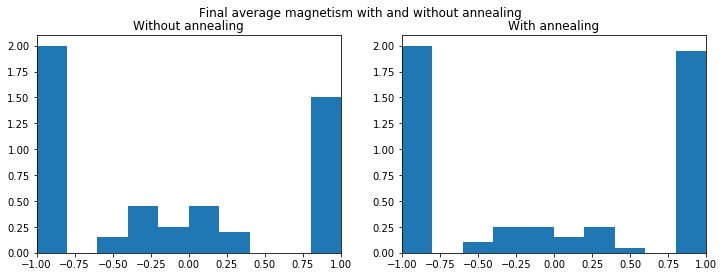

In [18]:
plt.figure(figsize=(12,4))
plt.suptitle("Final average magnetism with and without annealing")
plt.subplot(1,2,1)
plt.title("Without annealing")
plt.hist(ave_mags, bins=10, density=True)
plt.xlim(-1,1)
plt.subplot(1,2,2)
plt.title("With annealing")
plt.hist(ave_mags_2, bins=10, density=True)
plt.xlim(-1,1)
plt.show()

**Explain what would happen to the acceptance probability of the update step if the
temperature is set to 0. This motivates why we always set the temperature at least slightly
greater than 0.**

The state of the system would never change as this would result in an undefined computation. Even at very low temperature, the denominator decreases drastically and so the acceptance probability increases (which is why such large clusters change)